In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book= pd.read_csv("book (3).csv")

In [3]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
df=pd.get_dummies(book)
df.head(20)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [6]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)   #min threshld
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [8]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

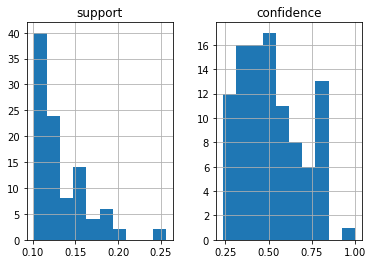

In [10]:
rules[["support","confidence"]].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

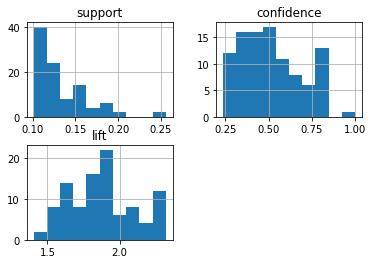

In [11]:
rules[["support","confidence","lift"]].hist()

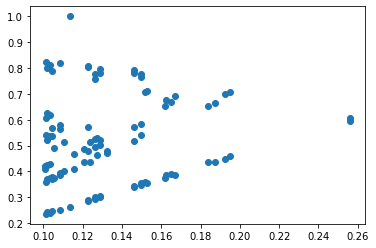

In [12]:
import matplotlib.pyplot as plt
#
plt.scatter(rules["support"],rules["confidence"])
plt.show()

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

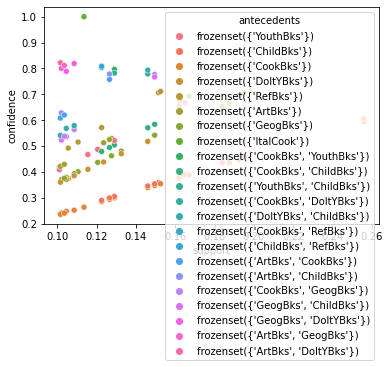

In [13]:
import seaborn as sns
sns.scatterplot("support","confidence",data=rules,hue="antecedents")
plt.show

In [1]:
# Highest conviction are obtained even by having intermediate support
# HIgher the lift and confidence , higher the conviction 